In [3]:
from oldModel import OrientationWei, sensory_noise_dist
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy
import numpy as np
from scipy.interpolate import UnivariateSpline, interp1d

In [4]:
model = OrientationWei(sigma_rep=0.01, stim_grid=np.linspace(0, 2*np.pi, 2000), rep_grid=np.linspace(0, 1, 2000))

# Get distribution of estimated thetas for different theta 0s

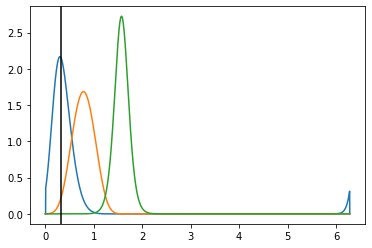

In [5]:
ptheta = model.theta_hat_dist(np.array([0.1*np.pi, 0.25*np.pi, 0.5*np.pi]), sigma_rep=0.03)
plt.plot(model.stim_grid, ptheta.T)
plt.axvline(0.1*np.pi, c='k')

# Make CDFs

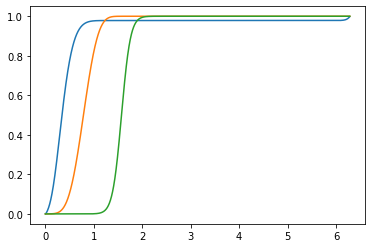

In [6]:
from scipy import integrate
plt.plot(model.stim_grid, integrate.cumtrapz(ptheta, model.stim_grid, initial=0.0).T)

### Use *Race equation*  to figure how likely a sample from one distribution will be bigger than a sample from another dsistribution

In [7]:
# Calculate how often distribution 1 is larger than distribution 2
def diff_dist(grid, p1, p2):
    # grid: 1d
    # p1/p2: n_orienations x n(grid)
    cdf2 = integrate.cumtrapz(p2, grid, initial=0.0, axis=1) 


    # for every grid point, distribution 1 is bigger than distribution 2
    # with a probability of being that value times the probability that dist
    # 2 is lower than that value
    p = p1*cdf2

    # Cummulative probability
    return integrate.trapz(p, grid)

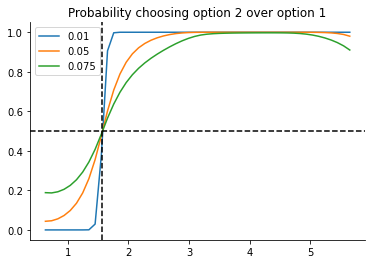

In [8]:
x1 = np.linspace(0.2*np.pi, 1.8*np.pi)
x2 = np.array([0.5*np.pi])

for sigma_rep in [0.01, 0.05, 0.075]:
    ptheta1 = model.theta_hat_dist(x1, sigma_rep=sigma_rep)
    ptheta2 = model.theta_hat_dist(x2, sigma_rep=sigma_rep)

    p_choose1 = diff_dist(model.stim_grid, ptheta1, ptheta2)
    plt.plot(x1, p_choose1, label=sigma_rep)
plt.legend()
plt.title('Probability choosing option 2 over option 1')
sns.despine()
plt.axvline(x2, c='k', ls='--')
plt.axhline(0.5, c='k', ls='--')

In [9]:
def value_function1(x):
    return (20-18*np.abs(np.sin(2*x)))


def value_function2(x):
    return 2+abs(18-abs(18-abs(18-abs(18-abs(18-abs(18-abs(18-x*72/np.pi)))))))


def value_function3(x):
    return 2+abs(18*np.cos(2*x))


def get_value_dist(x_stim, p_stim, value_function, bins=20, slow=True):
    x_stim = np.array(x_stim)

    assert(x_stim.ndim == 1), "x_stim should have only one dimension (same grid for all p_stims)"

    # For every bin in x_stim, calculate the probability mass within that bin 
    dx = x_stim[..., 1:] - x_stim[..., :-1]
    p_mass = ((p_stim[..., 1:] + p_stim[..., :-1]) / 2) * dx
    
    # Get the center of every bin
    x_value = value_function(x_stim[:-1] + dx/2.)

    # Now we estimate density by moving every bin to value space and see
    # how much probability mass ends up where in value space using a histogram 
    # (Weightedby the probability masses).

    # Slow implementation for now (Because for looping over distributions)
    if slow:
        ps = []
        for ix in range(len(p_stim)):
            h, edges = np.histogram(x_value, bins=bins, weights=p_mass[ix], density=True)
            ps.append(h)
        
        ps = np.array(ps)
        bin_centers = (edges[1:]+edges[:-1]) / 2

    else:
        # fast implementatiVjon
        # ix = np.repeat(range(p_mass.shape[0]), p_mass.shape[1])
        # x_value_ravel = np.repeat(x_value, p_mass.shape[0])
        # ps, _, edges = np.histogram2d(ix, x_value_ravel, weights=p_mass.ravel(), bins=(np.arange(0,p_mass.shape[0]+1), bins))
        # bin_centers = (edges[1:]+edges[:-1]) / 2
        # d =  np.trapz(ps, bin_centers)
        # ps /= d[:, np.newaxis]
        raise NotImplementedError

    # IDEA: The discrete histogram has some weird holes here and there
    # - a KDE approach would probably be slithgly cleaner

    return bin_centers, ps


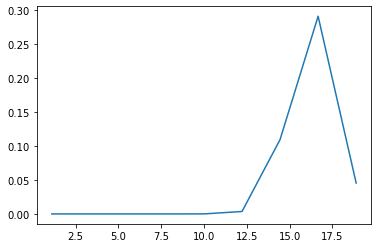

In [12]:
# x = np.linspace(0.0*np.pi, .75*np.pi, 50)
x = 0.95*np.pi
ptheta = model.theta_hat_dist(x, sigma_rep=0.01)
x_value, p_value = get_value_dist(model.stim_grid, ptheta, value_function2, bins=np.linspace(0, 20, 10))

plt.plot(x_value[:, np.newaxis], p_value[::5].T)

# Weird value function

# Different predictions for efficient coding with these three value functions

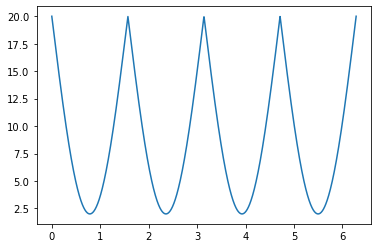

In [26]:
plt.plot(model.stim_grid, value_function1(model.stim_grid))

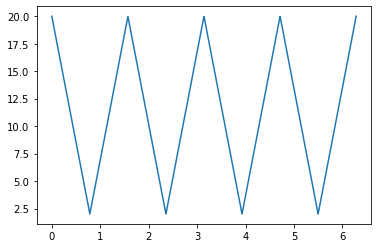

In [27]:
plt.plot(model.stim_grid, value_function2(model.stim_grid))

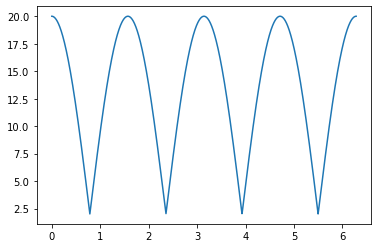

In [28]:
plt.plot(model.stim_grid, value_function3(model.stim_grid))

# Risk averse

In [29]:
def value_function4(x):
    return 2 + abs(18*np.sin(2*x))
    
def value_function5(x):
    return 20-abs(18-abs(18-abs(18-abs(18-abs(18-abs(18-abs(18-x*72/np.pi)))))))

def value_function6(x):
    return 20-abs(18*np.cos(2*x))

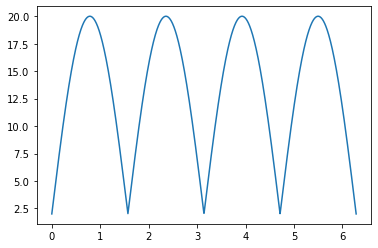

In [30]:
plt.plot(model.stim_grid, value_function4(model.stim_grid))

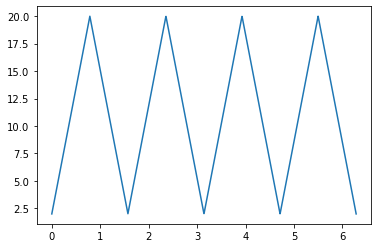

In [31]:
plt.plot(model.stim_grid, value_function5(model.stim_grid))

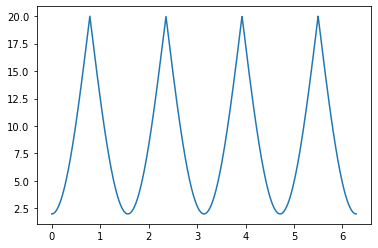

In [32]:
plt.plot(model.stim_grid, value_function6(model.stim_grid))

# Value distribution 

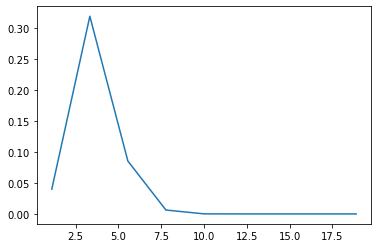

In [33]:
# x = np.linspace(0.0*np.pi, .75*np.pi, 50)
x = 0.75*np.pi
ptheta = model.theta_hat_dist(x, sigma_rep=0.01)
x_value, p_value = get_value_dist(model.stim_grid, ptheta, value_function2, bins=np.linspace(0, 20, 10))

plt.plot(x_value[:, np.newaxis], p_value[::5].T)

In [34]:
# Risk averse

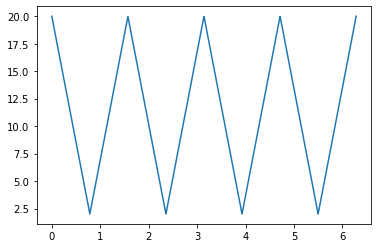

In [35]:
plt.plot(model.stim_grid, value_function2(model.stim_grid))

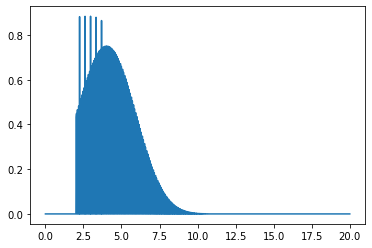

In [36]:
safe = 50.*np.pi/180.
ptheta = model.theta_hat_dist(safe, sigma_rep=0.01)
safe_value, p_safe = get_value_dist(model.stim_grid, ptheta, value_function2, bins=np.linspace(0, 20, 1000))
plt.plot(safe_value[:, np.newaxis], p_safe[::5].T)

In [37]:
scipy.integrate.simpson(p_safe, safe_value)

array([0.9396424])

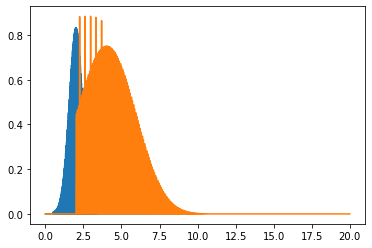

In [38]:
risky = 60.*np.pi/180.
risk_prob = 0.5
ptheta = model.theta_hat_dist(risky, sigma_rep=0.01)
risky_value, p_risky = get_value_dist(model.stim_grid, ptheta, value_function2, bins=np.linspace(0, 20, 1000))
risky_value = risky_value*risk_prob
p_risky = p_risky/risk_prob

# plt.plot(risky_value[:, np.newaxis], p_risky[::5].T)

p_risky_ = interp1d(risky_value, p_risky, fill_value='extrapolate', bounds_error=False)
p_risky = p_risky_(safe_value)
p_risky.squeeze()[safe_value>risky_value[-1]] = 0.0
plt.plot(risky_value[:, np.newaxis], p_risky[::5].T)
plt.plot(safe_value[:, np.newaxis], p_safe[::5].T)


In [39]:
diff_dist(safe_value, p_safe, p_risky)

array([0.53436775])

In [40]:
# Risk seeking

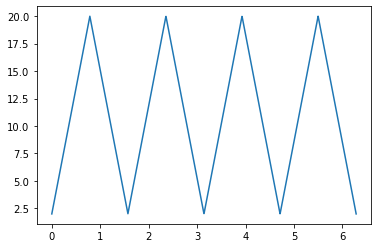

In [41]:
plt.plot(model.stim_grid, value_function5(model.stim_grid))

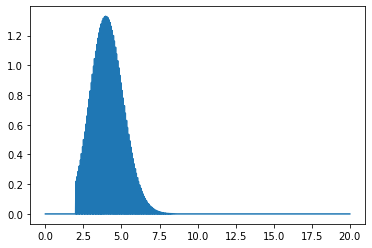

In [42]:
safe = 85.*np.pi/180.
ptheta = model.theta_hat_dist(safe, sigma_rep=0.01)
safe_value, p_safe = get_value_dist(model.stim_grid, ptheta, value_function5, bins=np.linspace(0, 20, 1000))
plt.plot(safe_value[:, np.newaxis], p_safe[::5].T)

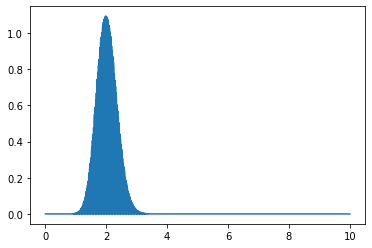

In [43]:
risky = 75.*np.pi/180.
risk_prob = 0.5
ptheta = model.theta_hat_dist(risky, sigma_rep=0.01)
risky_value, p_risky = get_value_dist(model.stim_grid, ptheta, value_function5, bins=np.linspace(0, 20, 1000))
risky_value = risky_value*risk_prob
p_risky = p_risky/risk_prob

# plt.plot(risky_value[:, np.newaxis], p_risky[::5].T)

p_risky_ = interp1d(risky_value, p_risky, fill_value='extrapolate', bounds_error=False)
p_risky = p_risky_(safe_value)
p_risky.squeeze()[safe_value>risky_value[-1]] = 0.0
plt.plot(risky_value[:, np.newaxis], p_risky[::5].T)
# plt.plot(safe_value[:, np.newaxis], p_safe[::5].T)



In [44]:
diff_dist(safe_value, p_safe, p_risky)

array([0.49922192])

# value = orientation

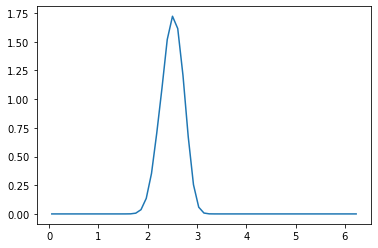

In [45]:
# x = np.linspace(0.0*np.pi, 2*np.pi, 50)
x = 0.8*np.pi
ptheta = model.theta_hat_dist(x, sigma_rep=0.03)
x_value, p_value = get_value_dist(model.stim_grid, ptheta, lambda x: x, bins=np.linspace(0, 2*np.pi, 60))

plt.plot(x_value[:, np.newaxis], p_value[::5].T)